In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

In [12]:
df = pd.read_csv('../output/jobs.csv')
def clean_and_split_salary(salary):
    if pd.isna(salary):
        return np.nan, np.nan
    salary = str(salary).replace('UAH', '').replace(' ', '').replace('\u2009', '').replace('\u202f', '')
    
    if '–' in salary or '-' in salary:
        low, high = salary.replace('–', '-').split('-')
        return int(low), int(high)
    else:
        return int(salary), int(salary)

df['salary_bottom'], df['salary_top'] = zip(*df['salary'].apply(clean_and_split_salary))

In [32]:
mean_salary_bottom = df['salary_bottom'].mean().round(0).astype(int)
mean_salary_top = df['salary_top'].mean().round(0).astype(int)

df['salary_bottom'] = df['salary_bottom'].fillna(mean_salary_bottom)
df['salary_top'] = df['salary_top'].fillna(mean_salary_top)
df['skills'] = df['skills'].fillna("")


In [33]:
df


,title,skills,company,description,link,salary_bottom,salary_top
0,Python/JS FullStack developer,"JavaScript, Python, Ініціативність, Самостійні...",AM media solutions,Ми — міжнародний бренд та команда експертів у ...,https://www.work.ua/en/jobs/5830401/,15917,22611
1,Викладач у дитячу IT-школу програмування (гейм...,"CSS, JavaScript, HTML, Комунікабельність, Акти...","Logika, всеукраїнська школа програмування для ...",ДЕ МИ ШУКАЄМО КАНДИДАТІВ : м.Буча та м.Ірпінь...,https://www.work.ua/en/jobs/5527582/,12000,12000
2,Викладач у дитячу IT-школу програмування (Scra...,"CSS, JavaScript, HTML, Комунікабельність, Акти...","Logika, всеукраїнська школа програмування для ...",ДЕ МИ ШУКАЄМО КАНДИДАТІВ : м.Бровари Ш кола...,https://www.work.ua/en/jobs/5481267/,12000,12000
3,Викладач у дитячу IT-школу програмування (гейм...,"CSS, JavaScript, HTML, Комунікабельність, Прог...","Logika, всеукраїнська школа програмування для ...",ДЕ МИ ШУКАЄМО КАНДИДАТІВ : м.Буча та м.Ірпінь...,https://www.work.ua/en/jobs/5466238/,14000,14000
4,Викладач програмування у дитячу IT-школу (,"Комунікабельність, Активність, Програмування, ...","Logika, всеукраїнська школа програмування для ...",ДЕ МИ ШУКАЄМО КАНДИДАТІВ : м. Переяслав Ш кол...,https://www.work.ua/en/jobs/5824770/,3000,7000
5,Web Developer,"Java, SQL, Git, GitLab, PostgreSQL, Знання при...","Клинико-Терапевтический институт, ООО",Вимоги : Знання і дотримання базових принцип...,https://www.work.ua/en/jobs/5805026/,20000,20000
6,Middle,"Docker, REST API, Redis, Machine learning, Dee...","Comparus UA (Компарус.ЮА, ТОВ)",Вимоги : Strong knowledge of Python 3.9 E...,https://www.work.ua/en/jobs/4821099/,15917,22611
7,Викладач у дитячу ІТ-школу програмування (Scra...,"Програмування, Scratch","Logika, всеукраїнська школа програмування для ...",Контакти: Тел. +380937124239 Show phone (Св...,https://www.work.ua/en/jobs/4455132/,4000,9000
8,Senior,"PostgreSQL, React, Docker, Vue.js, REST API, F...",BondexREF,Вимоги : 5+ years of professional Python d...,https://www.work.ua/en/jobs/5827859/,6500,15000
9,Middle,"SQL, Google Docs, PostgreSQL, Backend-розробка...",EasyLife,Наша компанія активно розвивається та продовжу...,https://www.work.ua/en/jobs/5696095/,50000,80000


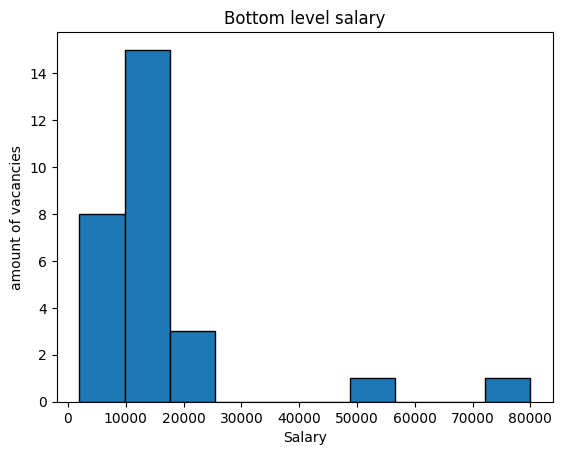

In [30]:
plt.hist(df['salary_bottom'], bins=10, edgecolor='black')
plt.title("Bottom level salary")
plt.xlabel("Salary")
plt.ylabel("amount of vacancies")
plt.show()

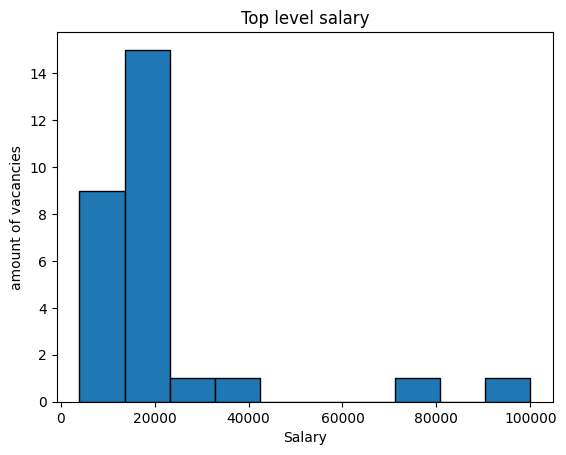

In [31]:
plt.hist(df['salary_top'], bins=10, edgecolor='black')
plt.title("Top level salary")
plt.xlabel("Salary")
plt.ylabel("amount of vacancies")
plt.show()

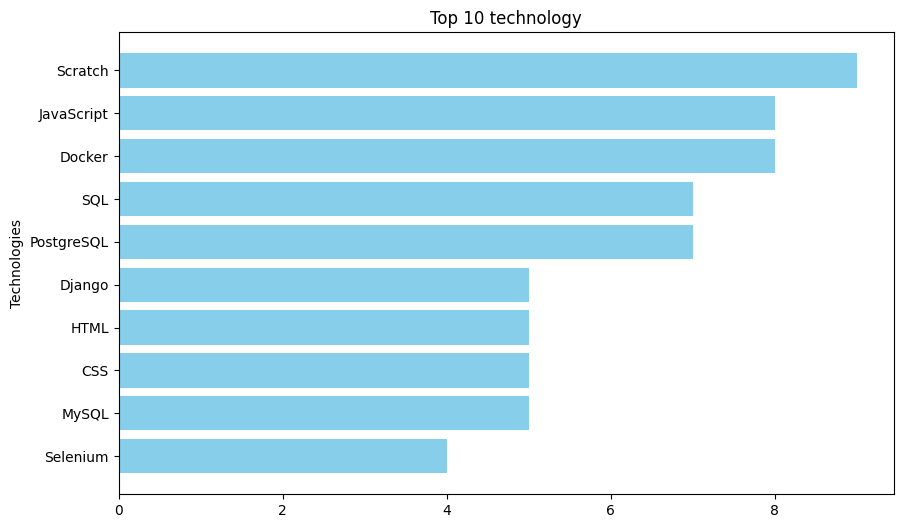

In [41]:
common_words = [
    'Комунікабельність', 'Креативність', 'Програмування', 'Творчий підхід',
    'Викладання', 'Активність', 'Відповідальність', 'Самостійність', 'Організованість',
    'Бажання вчитися', 'Творче мислення', 'Аналіз', 'Знання принципів ООП', "Бажання вчитися і розвиватися"
]

df['skills'] = df['skills'].fillna("")

all_skills = []
for skills in df['skills']:
    skill_list = [skill.strip() for skill in skills.split(',')]
    all_skills.extend([skill for skill in skill_list if skill not in common_words])
    
    skills_counter = Counter(all_skills)

skills_df = pd.DataFrame(skills_counter.items(), columns=['Technology', 'Count'])

top_skills = skills_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_skills['Technology'], top_skills['Count'], color='skyblue')
plt.ylabel('Technologies')
plt.title('Top 10 technology')
plt.gca().invert_yaxis()
plt.show()